In [82]:
#     MORFOLOJICAL IMAGE PROCESSING (MORFOLOJİK GÖRÜNTÜ İŞLEME)

In [83]:
# Görüntü işlemde morfolojik işlem, görüntülerdeki yapısal öğeleri inceleyen ve 
# manipüle eden işlemler grubuna verilen addır. 

# Bu işlemler genellikle ikili (binary) veya gri tonlamalı görüntüler üzerinde 
# gerçekleştirilir ve şekil, boyut, yapı gibi özellikleri çıkarmaya veya değiştirmeye yönelik
#matematiksel tekniklerdir. 

# Morfolojik işlemler, özellikle nesne sınırlarını, şekil özelliklerini ve bağlantıları 
# analiz etme ve iyileştirme amacıyla kullanılır.


# Morfolojik İşlemler : siyah-beyaz(binary) görüntüler üzerinde, görüntünün yapısal 
# özelliklerinin değiştirilmesine yarayan işlemler bütünüdür.

# 4 temel morfolojik işlem vardır:
# erosion (aşındırma) dilaton (genişletme) opening (açma) closing (kapama)


#  Bu konu başlığı altında yapılan işlemler:
	# 1. Gürültü oluşturma ve görselleştirme
		# white_noise → beyaz gürültü
		# black_noise → siyah gürültü
		# Gürültülü görüntüler orijinal görüntüye eklenir ve sonuç matplotlib ile gösterilir.
	
    # 2. Opening (Açma)
		# Önce erosion, sonra dilation yapılır
		# Amaç: beyaz gürültüleri temizlemek
		# Kod: cv2.morphologyEx(my_noised_img, cv2.MORPH_OPEN, my_kernel)

	# 3. Closing (Kapama)
		# Önce dilation, sonra erosion yapılır
		# Amaç: siyah gürültüleri veya boşlukları kapatmak
		# Kod: cv2.morphologyEx(my_black_noise_img, cv2.MORPH_CLOSE, my_kernel)

	# 4. Gradient (Gradyan)
		#  Görüntüdeki yoğunluk değişimlerini tespit eder
		# Kenar belirleme için kullanılır
		# Kod: cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

	# 5. Görselleştirme
		# Orijinal, gürültülü, opening/closing ve gradient görüntüleri subplot ile 
        # karşılaştırmalı gösteriliyor.




In [84]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [85]:
print(os.getcwd())


C:\Users\Musa\Documents\Dersler\Dijital Görüntü Çözümleme\Hafta_2


In [86]:
# Görüntü okuma ve hazırlama
my_binary_img = cv2.imread("../image/deneme.png", 0)

print(my_binary_img.shape)  # Görüntü boyutlarını öğrenmek .shape()
print(type(my_binary_img))

(648, 1152)
<class 'numpy.ndarray'>


In [87]:
# morfolojik işlemleri yerine getirmek için kernel matrisini oluşturuyoruz.
# Bu matris 5x5lik ve tamamen int tipinde 1 değerinden oluşacaktır.
# Bunun sebebi erosion (aşındırma) işleminde,bu matrisin kapladığı tüm alan 255 ya da 1 
# değerinden oluşuyorsa o zaman o değer sabit kalacak.
#  Akasi halde,o piksel siyah değerini alıcaktır.

my_kernel = np.ones((5,5), dtype = np.uint8)

In [112]:
# # Erosion (Aşınma): siyah beyaz görüntülerde beyaz rengini temsil eden
# piksellerin daha da küçültülmesi işlemini yapar.
#  Yani Beyaz pikseller küçültülür, kenarlar incelir.
my_erosion_img = cv2.erode(my_binary_img, my_kernel, iterations = 6)


(np.float64(-0.5), np.float64(1151.5), np.float64(647.5), np.float64(-0.5))

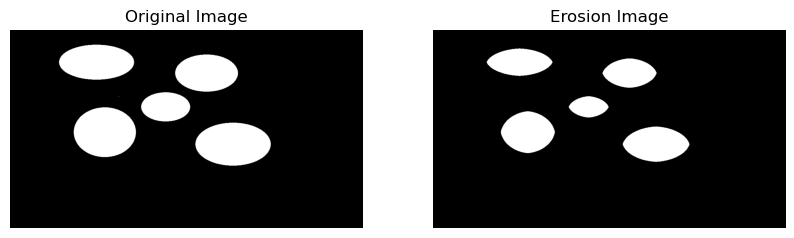

In [113]:
fig = plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.imshow(my_binary_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(my_erosion_img,cmap='gray')
plt.title('Erosion Image')
plt.axis('off')

In [114]:
# dilation (genişletme) işlemi : erosion işleminin tam tersi olarak çalışır. 
# Yani kernel matrisinin kapladığı alanda 1 değeri varsa o zaman o piksel değeri 1 olarak 
# kalır. 
# Aksi halde o piksel değeri 0 olur.

# Genişleme (Dilation); Erosion işleminin tam tersidir. Görüntüdeki beyaz
# rengi temsil eden piksellerin büyümesini, genişlemesini sağlar.

my_dilation_img = cv2.dilate(my_binary_img,my_kernel,iterations=6)

(np.float64(-0.5), np.float64(1151.5), np.float64(647.5), np.float64(-0.5))

<Figure size 1000x700 with 0 Axes>

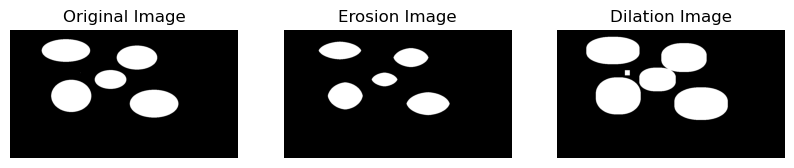

In [115]:
fig = plt.figure(figsize=(10,7))

# 1. Görsel: Orijinal
fig = plt.figure(figsize=(10,7))

plt.subplot(1,3,1)
plt.imshow(my_binary_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(my_erosion_img,cmap='gray')
plt.title('Erosion Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(my_dilation_img,cmap='gray')
plt.title('Dilation Image')
plt.axis('off')

In [74]:
new_img = cv2.imread("../image/write.png", 0)
print(type(new_img))

<class 'numpy.ndarray'>


In [116]:
new_img.shape

(648, 1152)

In [119]:
# Gürültü ekleme
# Beyaz  gürültüler oluşturulur ve görüntüye eklenir.

white_noise = np.random.randint(0,2,size = new_img.shape[:2])
white_noise *= 255

(np.float64(-0.5), np.float64(1151.5), np.float64(647.5), np.float64(-0.5))

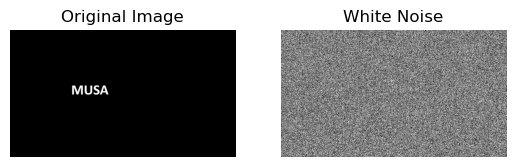

In [120]:
plt.subplot(1,2,1)
plt.imshow(new_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(white_noise,cmap='gray')
plt.title('White Noise')
plt.axis('off')



Text(0.5, 1.0, 'Noised Image (Color Display)')

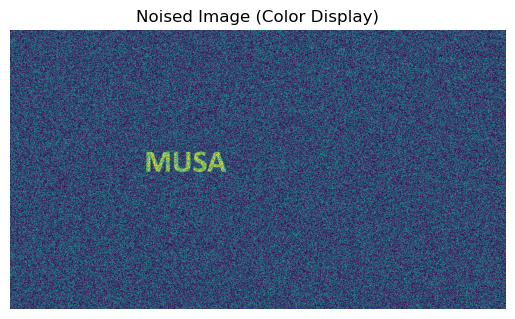

In [97]:
# Orijinal görüntüye (new_img) beyaz gürültü (white_noise) eklenir.
# Sonuç: gürültülü (noised) görüntü elde edilir.

my_noised_img = white_noise + new_img
plt.imshow(my_noised_img)
plt.axis('off')
plt.title('Noised Image (Color Display)')

Text(0.5, 1.0, 'Noised Image (Gray Display)')

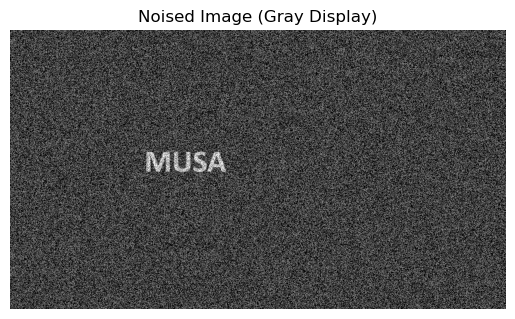

In [98]:
# Orijinal gri tonlamalı görüntü (new_img) üzerine rastgele beyaz gürültü 
#(white_noise) eklenir.
# Sonuç: gürültülü bir görüntü (noised image) elde edilir.
# Bu işlem, görüntüde parazitli bir görünüm oluşturur 
# (örneğin eski TV ekranındaki karıncalanma gibi).

my_noised_img = white_noise + new_img
plt.imshow(my_noised_img, cmap="gray")
plt.axis("off")
plt.title("Noised Image (Gray Display)")

In [99]:

# Açma/Açılma (Opening) İşlemi: Önce erosion sonra da dilation işlemlerinin
# arka arkaya uygulanması ile elde edilir.
# Burada amaç, beyaz piksellerin neden olduğu gürültünün temizlenmesidir.
# Görüntü işlemede gürültü, görüntüde istenmeyen piksellerdir.
# Tıpkı bir müzik dinlerken araya cızırtı seslerinin girmesi gibi.

# Opening (Açma)
# Önce erosion, sonra dilation
# Amaç: beyaz gürültüleri temizlemek

my_opnening_img = cv2.morphologyEx(my_noised_img.astype(np.float32),
                                  cv2.MORPH_OPEN, my_kernel)

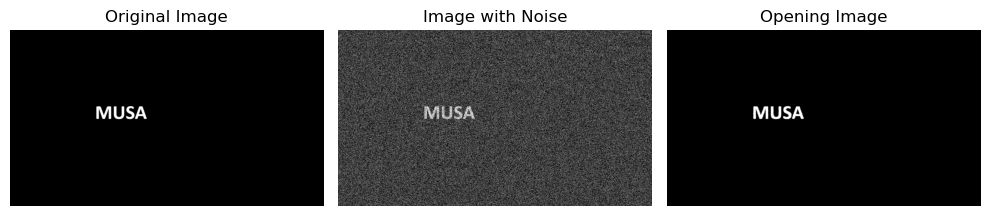

In [100]:

plt.figure(figsize=(10, 7))

plt.subplot(1,3,1)
plt.imshow(new_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(my_noised_img,cmap='gray')
plt.title('Image with Noise')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(my_opnening_img, cmap="gray")
plt.axis("off")
plt.title("Opening Image")

plt.tight_layout()
plt.show()


In [60]:
# Gürültü ekleme
# siyah gürültüler oluşturulur ve görüntüye eklenir.

black_noise = np.random.randint(0,2,size=new_img.shape[:2])
black_noise *= -255


In [61]:
my_black_noise_img = black_noise + new_img

Text(0.5, 1.0, 'Black Noised Image')

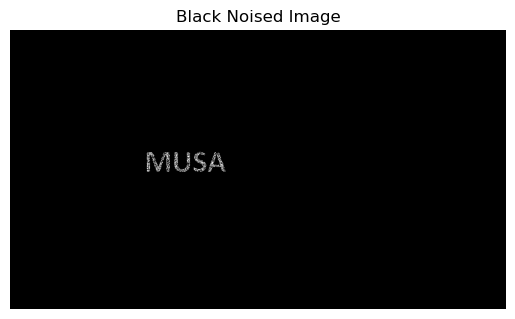

In [104]:
# Görüntüde 245’ten küçük (yani koyu renkli veya siyaha yakın) tüm pikseller tam siyah 
# (0) yapılır.
# → Bu sayede siyah gürültü (black noise) bölgeleri belirginleşir.
my_black_noise_img[my_black_noise_img <= -245] = 0

plt.imshow(my_black_noise_img, cmap = "gray")   # Görüntü gri tonlamalı olarak gösterilir.
plt.axis("off")
plt.title("Black Noised Image")

Text(0.5, 1.0, 'Closing Image')

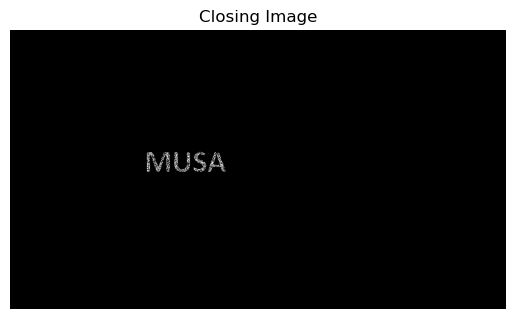

In [105]:
# Closing (kapanma) : açma işleminin tam tersi olarak çalışır.
# gürültülerde (mat görünümlerde) oldukça işe yarar.

# Closing (Kapatma/Kapama), bu da opening işleminin tam tersidir. 
# Görüntüye önce genişleme sonra erozyon işlemini uygular

# Önce dilation, sonra erosion
# Amaç: siyah gürültüleri veya boşlukları kapatmak

my_closing_img = cv2.morphologyEx(my_black_noise_img.astype(np.float32),
                                  cv2.MORPH_OPEN, my_kernel)
plt.imshow(my_black_noise_img, cmap="gray")
plt.axis("off")
plt.title("Closing Image")

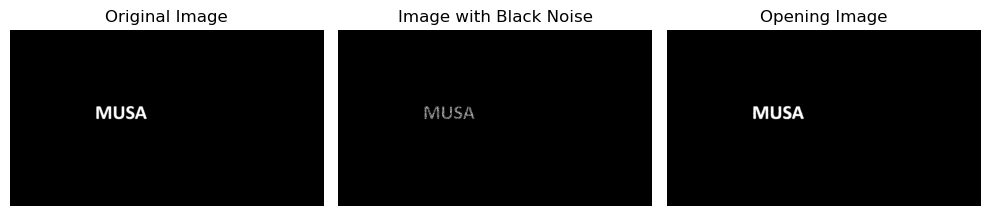

In [106]:
plt.figure(figsize=(10, 7))

plt.subplot(1,3,1)
plt.imshow(new_img,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(my_black_noise_img,cmap='gray')
plt.title('Image with Black Noise')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(my_opnening_img, cmap="gray")
plt.axis("off")
plt.title("Opening Image")


plt.tight_layout()
plt.show()


In [69]:
# Görüntü işlemede gradient: bir pikselden diğer bir piksele geçerken değişimin
#  yoğunluğunu ifade eder
# pikseller arasında büyük bir fark varsa, yoğunluk fazla olur ve kenarlar bu şekilde tespit 
# edilir.

# gradient (gradyan) işlemi:
#  Görüntü işlemede gradyan ise, bir görüntünün yoğunluk değişimini
# temsil eder. Bir pikselden başka bir piksele geçerken yaşanan değişimlerin
# büyüklüğünü verir. Bu işlem genellikle, kenar tespit işleminde kullanılır

# Piksel yoğunluğu değişimlerini hesaplar, kenar tespiti için kullanılır.

my_gradient_1 = cv2.morphologyEx(my_binary_img, cv2.MORPH_GRADIENT, my_kernel)
my_gradient_2 = cv2.morphologyEx(new_img, cv2.MORPH_GRADIENT, my_kernel)

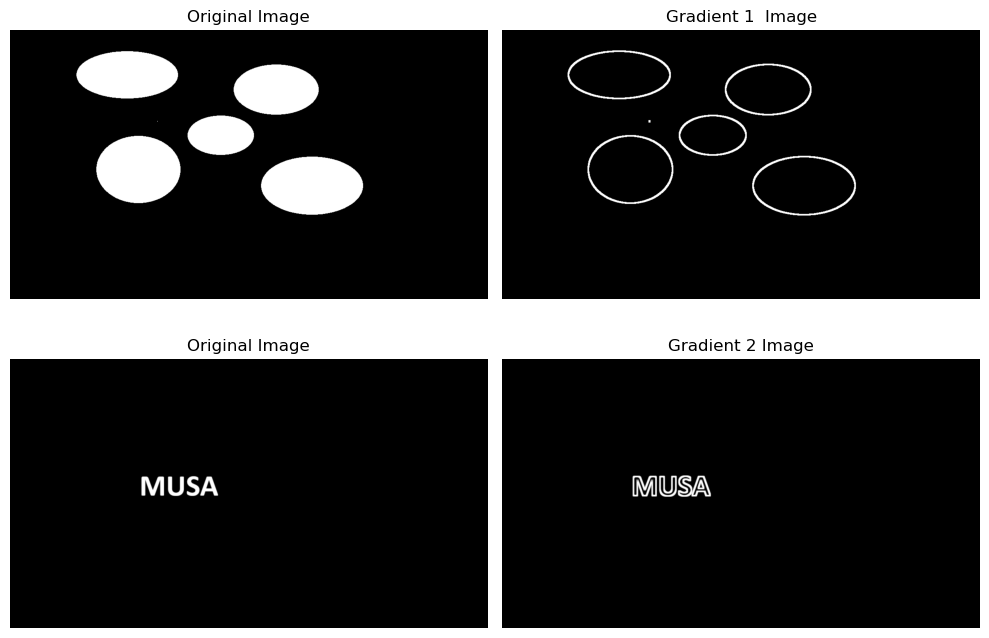

In [70]:
fig = plt.figure(figsize=(10,7))



plt.subplot(2, 2, 1)
plt.imshow(my_binary_img, cmap="gray")
plt.axis("off")
plt.title("Original Image")


plt.subplot(2, 2, 2)
plt.imshow(my_gradient_1, cmap="gray")
plt.axis("off")
plt.title("Gradient 1  Image")

plt.subplot(2, 2, 3)
plt.imshow(new_img, cmap="gray")
plt.axis("off")
plt.title("Original Image")

plt.subplot(2, 2, 4)
plt.imshow(my_gradient_2, cmap="gray")
plt.axis("off")
plt.title("Gradient 2 Image")

plt.tight_layout()
plt.show()


In [67]:
# Özet:

# Morfolojik görüntü işlemenin temel yöntemlerini içeriyor:

# Erosion: Beyaz pikselleri küçültme 
# Etki : Nesne kenarları incelir, küçük gürültüler kaybolur

# Dilation: Beyaz pikselleri büyütme
# Etki : Nesneler büyür, boşluklar kapanır

# Opening: Beyaz gürültü temizleme, Erosion → Dilation
# Etki : Beyaz gürültüler temizlenir, küçük beyaz noktalar kaybolur

# Closing: Siyah gürültü kapama, Dilation → Erosion
# Etki : Siyah boşluklar kapatılır, nesne bütünlüğü artar

# Gradient: Kenar tespiti, Dilation - Erosion
# Etki : Nesne kenarları ortaya çıkar, kenar tespiti yapılır